### Cross Entropy Method with Neuroevolution

The idea behind the cross entropy method is to encode every feature of the genetic encoding as a normal distribution.

The PDF of a normal distribution is defined as following, where $\mu$ is the mean, $\sigma$ is the standart deviation:
$$ p(x\; |\; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

Lets visualize some of the first.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import unicode_literals
import matplotlib.patches as patches
from scipy.stats import norm
import numpy as np

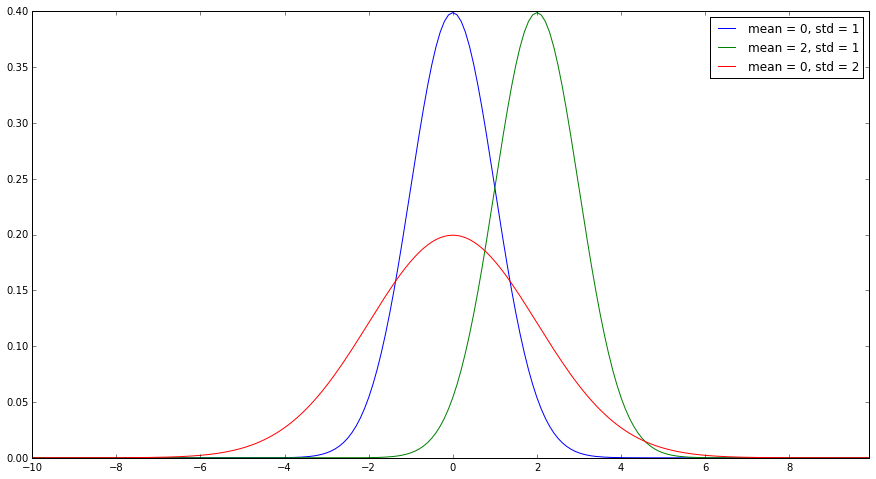

In [19]:
x = np.arange(-10, 10, 0.1)

fig = plt.figure(figsize=(15,8))


plt.xticks(np.arange(min(x), max(x)+1, 2))

plt.plot(x, norm.pdf(x, 0, 1), label = 'mean = 0, std = 1')
plt.plot(x, norm.pdf(x, 2, 1), label = 'mean = 2, std = 1')
plt.plot(x, norm.pdf(x, 0, 2), label = 'mean = 0, std = 2')
plt.legend() # (bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

To sample from this distribution we need the mean, the standart deviation and the number of elements $n$

In [20]:
mean = 0
std  = 1
n    = 200

res = np.random.normal(mean, std, n)

print res[0:20]

[-1.03132718  0.36766144 -0.8892572  -1.68522837  0.00613715  0.1622251
 -1.87556632 -0.89182707 -0.95690438 -0.98005876 -0.17093044  0.39053662
 -0.14992865 -0.97098975 -0.27618424 -0.5014868   0.70679727 -1.81246825
 -0.35453291 -1.23890488]


These sample values correspond to the blue plot in the first figure. Let's test if the mean and std are really the ones we provided.

In [21]:
print("Provided mean = {0}, calculated mean = {1}").format(np.mean(res), mean)
print("Provided std = {0}, calculated std = {1}").format(np.std(res), std)

Provided mean = -0.109045273559, calculated mean = 0
Provided std = 0.946112398761, calculated std = 1



Let's say the genetic encoding is based upon 4 features and we have 5 individuals. That means we will have 4 distinct normal distributions. For presentation purposes we'll initialize the means and standart deviations randomly in the range [0,4]

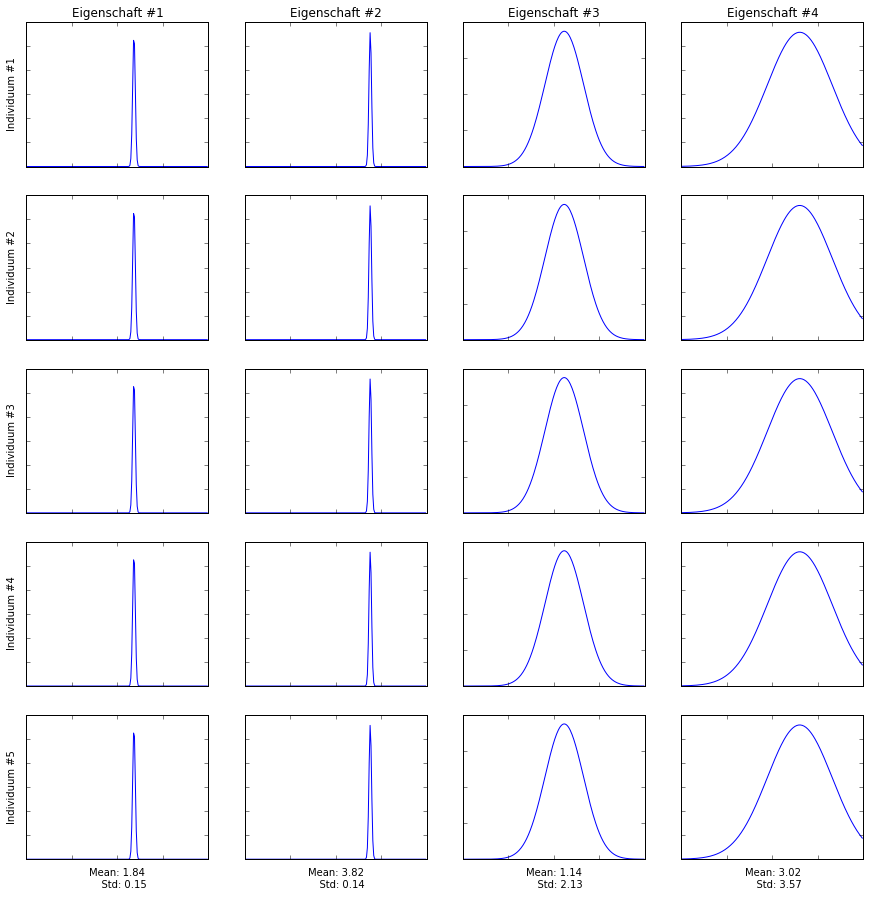

In [22]:
# setup a 5 x 4 plot
dimX = 5
dimY = 4

# create random means and standart deviations
means = np.random.rand(dimY,1) * 4
stds  = np.random.rand(dimY,1) * 4

fig, axarr = plt.subplots(dimX, dimY, figsize=(15,15))

# fill multidimensional plot and 
for i in range(0,dimX):
    for j in range(0,dimY):
        axarr[i,j].plot(norm.pdf(x,means[j], stds[j]))
        axarr[i,j].set_xticklabels([])
        axarr[i,j].set_yticklabels([])
        # first row
        if i == 0:
            axarr[i,j].set_title('Eigenschaft #' + str(j+1))
        # first column
        if j == 0:
            axarr[i,j].set_ylabel("Individuum #" + str(i+1))
        # last row 
        if (i == (dimX - 1)):
            axarr[i,j].set_xlabel("Mean: "   + ("%.2f" % means[j])
                                + "\n    Std: " + ("%.2f" % stds[j]))



Now we look at an example what it means to check for the probability of $\mathcal{X}$ if $a \leq \mathcal{X} \leq b$.
The probability of exactly $2cm$ almost none, but if we check the the probability that it will rain 1cm to 3cm the surface area under the PDF says it all.

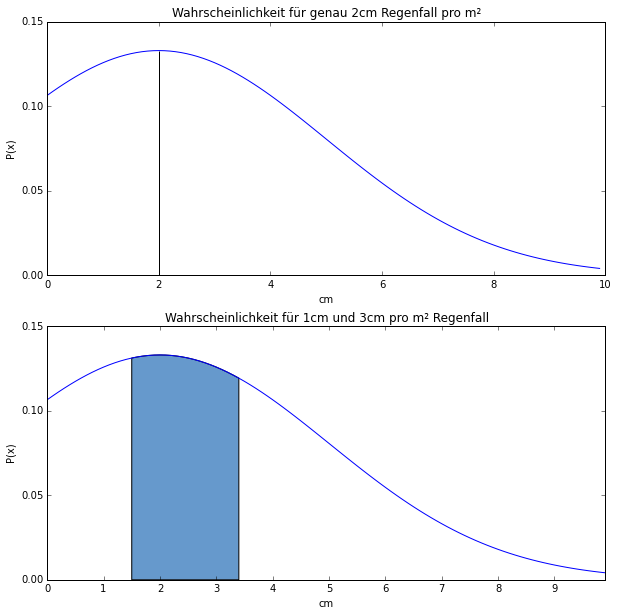

In [23]:
x = np.arange(0, 10, 0.1)
y = norm.pdf(x, 2, 3)

fig, axarr = plt.subplots(2, 1, figsize=(10,10))

plt.xticks(np.arange(min(x), max(x)+1, 1))

axarr[0].plot(x, y)
axarr[0].fill_between(x[20:21], y[20:21])
axarr[0].set_xlabel("cm")
axarr[0].set_ylabel("P(x)")
axarr[0].set_yticks(np.arange(0,0.2,0.05))
axarr[0].set_title("Wahrscheinlichkeit für genau 2cm Regenfall pro m²")

axarr[1].plot(x, y)
axarr[1].fill_between(x[15:35], y[15:35], facecolor="#6699CC")
axarr[1].set_xlabel("cm")
axarr[1].set_ylabel("P(x)")
axarr[1].set_yticks(np.arange(0,0.2,0.05))
axarr[1].set_title("Wahrscheinlichkeit für 1cm und 3cm pro m² Regenfall")